<a href="https://colab.research.google.com/github/Anggunasr/MSBA2425/blob/main/Text_Processing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Processing 2

In [1]:
import pandas as pd
import re
import nltk

In [2]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

# Download extra packages

In [3]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Read the file

In [31]:
# df = pd.read_csv('https://raw.githubusercontent.com/RDGopal/IB9LQ0-GenAI/main/Data/sms_spam.csv')
df = pd.read_csv('oct_delta.csv')

In [32]:
df

,weekday,month,date,year,text
0,Thu,Oct,1,2015,@mjdout I know that can be frustrating..we hop...
1,Thu,Oct,1,2015,@rmarkerm Terribly sorry for the inconvenience...
2,Thu,Oct,1,2015,"@checho85 I can check, pls follow and DM your..."
3,Thu,Oct,1,2015,"@nealaa ...Alerts, pls check here: http://t.co..."
4,Thu,Oct,1,2015,@nealaa ...advisory has only been issued for t...
...,...,...,...,...,...
1372,Thu,Oct,15,2015,@satijp Woohoo! Way to go Marla and Mira! Happ...
1373,Thu,Oct,15,2015,@lukenbaugh1 You're welcome! Have a great day!...
1374,Thu,Oct,15,2015,"@jeffcarp If you do not make your connection,..."
1375,Thu,Oct,15,2015,@jeffcarp ...719pm. *DD 2/2


# Accessing files from Github

In [6]:
import requests

def list_github_directory(user, repo, path):
    url = f"https://api.github.com/repos/{user}/{repo}/contents/{path}"
    response = requests.get(url)
    if response.status_code == 200:
        content = response.json()
        return [file['name'] for file in content if file['type'] == 'file']
    else:
        print("Failed to retrieve data:", response.status_code)
        return []

# Usage
user = 'RDGopal'
repo = 'IB9LQ0-GenAI'
path = 'Data'
files = list_github_directory(user, repo, path)
print("Files in the Data folder:", files)


Files in the Data folder: ['26k-consumer-complaints.csv', 'Amazon-Product-Reviews.csv', 'Headlines_5000.csv', 'Machine_stops.pdf', 'Reviews.csv', 'Roomba.csv', 'Tweets.csv', 'disaster_tweets.csv', 'docAI.pdf', 'financial_news.csv', 'oct_delta.csv', 'pyschology.csv', 'slang_lexicon.csv', 'sms_spam.csv', 'tinyshakespeare.txt', 'titanic.csv']


# Data Preprocessing

In [33]:
# Lowercase
df['text'] = df['text'].str.lower()

In [34]:
# Tokenize
df['tokens'] = df['text'].apply(nltk.word_tokenize)

In [35]:
# get stopwords
stop_words = stopwords.words('english')
extra_words = ['.','*',',']
stop_words.extend(extra_words)

In [13]:
# stop_words

In [36]:
# Remove stopwords
df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words and token.isalpha()])

In [37]:
df.tokens.head()

,tokens
0,"[mjdout, know, frustrating, hope, parked, depl..."
1,"[rmarkerm, terribly, sorry, inconvenience, ass..."
2,"[check, pls, follow, dm, confirmation, review,..."
3,"[nealaa, alerts, pls, check, http, jh]"
4,"[nealaa, advisory, issued, bahamas, could, cha..."


In [14]:
# Create a PorterStemmer object
stemmer = PorterStemmer()
dt = df.copy()
dt['tokens'] = dt['tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

In [15]:
dt.head()

,type,text,tokens
0,ham,"go until jurong point, crazy.. available only ...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,ok lar... joking wif u oni...,"[ok, lar, joke, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, think, goe, usf, live, around, though]"


In [16]:
# Lemmatize
lemmatizer = WordNetLemmatizer()
dt = df.copy()
dt['tokens'] = dt['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])
dt.head()


,type,text,tokens
0,ham,"go until jurong point, crazy.. available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, think, go, usf, life, around, though]"


In [17]:
# Combine tokens back into a cleaned review
dt['text1'] = dt['tokens'].apply(lambda tokens: ' '.join(tokens))

In [18]:
dt[['text','text1']]

,text,text1
0,"go until jurong point, crazy.. available only ...",go jurong point crazy available bugis n great ...
1,ok lar... joking wif u oni...,ok lar joking wif u oni
2,free entry in 2 a wkly comp to win fa cup fina...,free entry wkly comp win fa cup final tkts may...
3,u dun say so early hor... u c already then say...,u dun say early hor u c already say
4,"nah i don't think he goes to usf, he lives aro...",nah think go usf life around though
...,...,...
5569,this is the 2nd time we have tried 2 contact u...,time tried contact u pound prize claim easy ca...
5570,will ã¼ b going to esplanade fr home?,b going esplanade fr home
5571,"pity, * was in mood for that. so...any other s...",pity mood suggestion
5572,the guy did some bitching but i acted like i'd...,guy bitching acted like interested buying some...


In [38]:
# Put it all into a function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = stopwords.words('english')
    extra_words = ['.','*',',']
    stop_words.extend(extra_words)
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

In [39]:
df['tokens'] = df['text'].apply(preprocess_text)

In [40]:
df

,weekday,month,date,year,text,tokens
0,Thu,Oct,1,2015,@mjdout i know that can be frustrating..we hop...,mjdout know frustrating hope parked deplaned s...
1,Thu,Oct,1,2015,@rmarkerm terribly sorry for the inconvenience...,rmarkerm terribly sorry inconvenience assistan...
2,Thu,Oct,1,2015,"@checho85 i can check, pls follow and dm your...",check pls follow dm confirmation review aa
3,Thu,Oct,1,2015,"@nealaa ...alerts, pls check here: http://t.co...",nealaa alert pls check http jh
4,Thu,Oct,1,2015,@nealaa ...advisory has only been issued for t...,nealaa advisory issued bahamas could change ch...
...,...,...,...,...,...,...
1372,Thu,Oct,15,2015,@satijp woohoo! way to go marla and mira! happ...,satijp woohoo way go marla mira happy travel dd
1373,Thu,Oct,15,2015,@lukenbaugh1 you're welcome! have a great day!...,welcome great day rd
1374,Thu,Oct,15,2015,"@jeffcarp if you do not make your connection,...",jeffcarp make connection gate agent advise opt...
1375,Thu,Oct,15,2015,@jeffcarp ...719pm. *dd 2/2,jeffcarp dd


#  Your Turn
Read and preprocess the file `oct_delta.csv`

# Bag-of-Words and tf-idf

In [41]:
# create list of tokens
documents = df['tokens'].tolist()

In [23]:
# documents

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gon na home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt send cost tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c lccltd pobox',
 'searching right word thank breather promis

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer(min_df=5, max_df=0.5)  # Apply filtering --> min_df : ex we have 1000 doc, if it not exist in 5 of that, then we get rid. or if it too often, like in 50% of the doc, then we also get rid of that

# Fit the vectorizer to documents and transform them into a BoW matrix
bow_matrix = vectorizer.fit_transform(documents)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
# Apply filtering # at least appears in 5 documents, no more than 50%
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.5)

# Fit the vectorizer and transform documents into a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8108 stored elements and shape (1377, 362)>

In [45]:
from collections import Counter

# Get word frequencies from the CountVectorizer vocabulary
word_counts = Counter(dict(zip(vectorizer.get_feature_names_out(), bow_matrix.sum(axis=0).A1)))

In [46]:
word_counts

Counter({'aa': np.int64(74),
         'ab': np.int64(43),
         'able': np.int64(34),
         'aboard': np.int64(6),
         'accept': np.int64(7),
         'account': np.int64(10),
         'ad': np.int64(14),
         'add': np.int64(5),
         'additional': np.int64(6),
         'advise': np.int64(8),
         'agent': np.int64(36),
         'agree': np.int64(6),
         'air': np.int64(10),
         'aircraft': np.int64(5),
         'airport': np.int64(58),
         'along': np.int64(11),
         'already': np.int64(8),
         'also': np.int64(17),
         'alternate': np.int64(6),
         'amp': np.int64(72),
         'another': np.int64(10),
         'apologize': np.int64(30),
         'apology': np.int64(94),
         'app': np.int64(5),
         'appreciate': np.int64(29),
         'appreciated': np.int64(5),
         'area': np.int64(7),
         'arrive': np.int64(6),
         'arriving': np.int64(5),
         'asap': np.int64(8),
         'assist': np.int64(61),

# Frequency Analysis

In [28]:
!pip install matplotlib wordcloud


To perform frequency analysis, we need to count how often each word appears in your corpus. We can utilize the dictionary and the Bag-of-Words (BoW) corpus

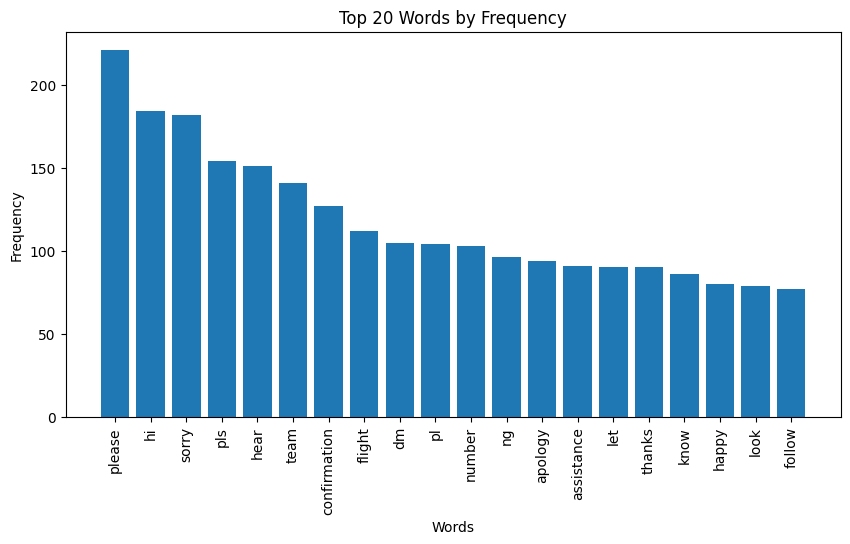

In [47]:
from collections import Counter
import matplotlib.pyplot as plt

# Assuming you have word_counts from CountVectorizer as described previously

# Sort words by frequency
sorted_word_counts = word_counts.most_common()

# Prepare data for plotting
words, counts = zip(*sorted_word_counts)  # Unzip into words and counts

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(words[:20], counts[:20])  # Plot top 20 words
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words by Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

# Creating a Word Cloud
To create a word cloud, you will need the frequencies in a dictionary format, where the keys are words and the values are their frequencies.

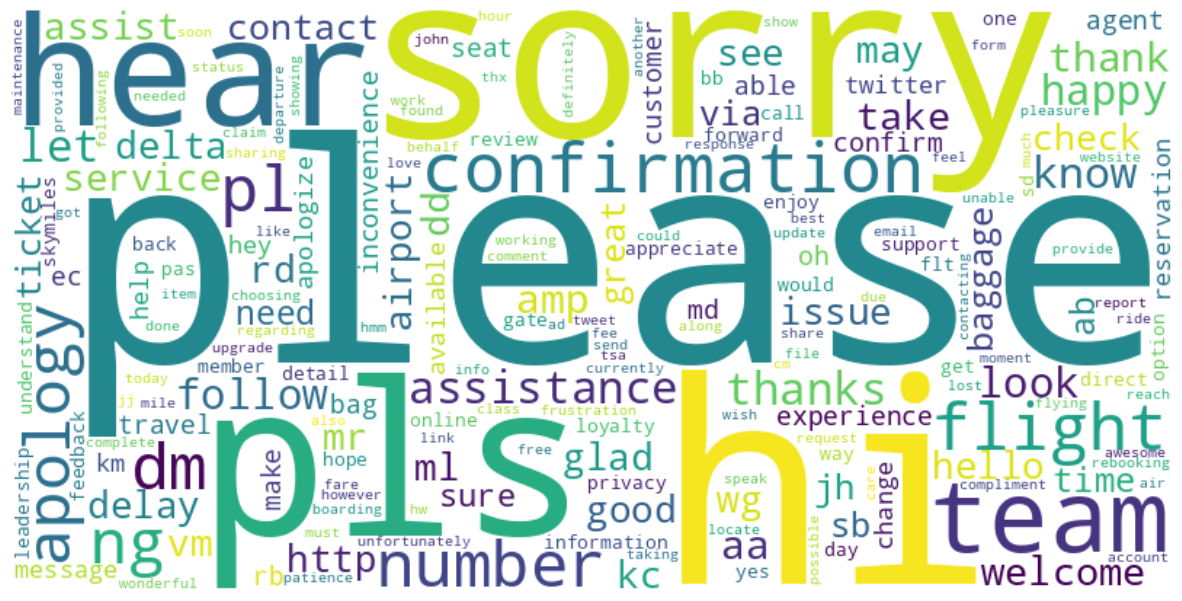

In [48]:
from wordcloud import WordCloud

# Creating a dictionary for word cloud
word_freq_dict = dict(sorted_word_counts)

# Creating word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(word_freq_dict)

# Displaying the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


# Your Turn
Conduct frequency analysis with `oct_delta.csv` file.

# Tiny Shakespeare novel

### Read the file locally

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the text file
with open('/content/tinyshakespeare.txt', 'r') as file:
    text = file.read().lower()

# Tokenize the text
tokens = word_tokenize(text)


### Or Read the file from GitHub

In [49]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

import requests

# URL to the raw text file on GitHub
url = 'https://raw.githubusercontent.com/RDGopal/IB9LQ0-GenAI/main/Data/tinyshakespeare.txt'

# Use requests to get the content of the file
response = requests.get(url)

# Ensure the request was successful
if response.status_code == 200:
    text = response.text.lower()
    # Continue processing the text as needed
else:
    print("Failed to retrieve the file. Status code:", response.status_code)

# Tokenize the text
tokens = word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
len(tokens)

254768

## Zipf's Law

Zipf's Law is an empirical law that suggests the frequency of a word in a natural language text is inversely proportional to its rank in the frequency table. To test Zipf's Law with your tokenized text data, we follow the steps below:

1. **Calculate Word Frequencies**: Count how often each word appears in your tokenized text.

2. **Sort Words by Frequency**: Rank the words by their frequency in descending order.

3. **Plot the Frequencies**: Plot the frequency of each word against its rank on a log-log plot.

4. **Analyze the Plot**: Zipf's Law predicts a linear relationship on a log-log plot with a slope of approximately -1.


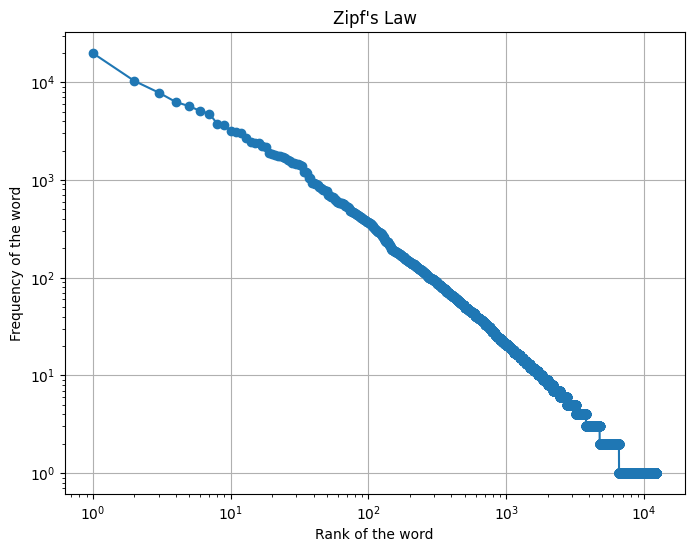

In [51]:
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Count frequencies
word_counts = Counter(tokens)

# Sort words by frequency
sorted_word_counts = word_counts.most_common()

# Prepare data for plotting
ranks = range(1, len(sorted_word_counts) + 1)
frequencies = [freq for _, freq in sorted_word_counts]

# Log-log plot
plt.figure(figsize=(8, 6))
plt.loglog(ranks, frequencies, marker="o")
plt.title('Zipf\'s Law')
plt.xlabel('Rank of the word')
plt.ylabel('Frequency of the word')
plt.grid(True)
plt.show()


In [52]:
# Get English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from tokens
filtered_tokens = [token for token in tokens if token not in stop_words and token.isalpha()]


In [53]:
len(filtered_tokens)

103586

In [54]:
from collections import Counter

# Count word frequencies
word_counts = Counter(filtered_tokens)


In [55]:
word_counts

Counter({'first': 362,
         'citizen': 100,
         'proceed': 21,
         'hear': 230,
         'speak': 293,
         'resolved': 15,
         'rather': 77,
         'die': 139,
         'famish': 4,
         'know': 352,
         'caius': 17,
         'marcius': 122,
         'chief': 7,
         'enemy': 44,
         'people': 99,
         'let': 525,
         'us': 399,
         'kill': 77,
         'corn': 15,
         'price': 7,
         'verdict': 2,
         'talking': 5,
         'done': 170,
         'away': 186,
         'second': 168,
         'one': 426,
         'word': 127,
         'good': 662,
         'citizens': 40,
         'accounted': 2,
         'poor': 157,
         'patricians': 9,
         'authority': 15,
         'surfeits': 2,
         'would': 534,
         'relieve': 3,
         'yield': 43,
         'superfluity': 2,
         'wholesome': 9,
         'might': 106,
         'guess': 21,
         'relieved': 1,
         'humanely': 1,
         'thi

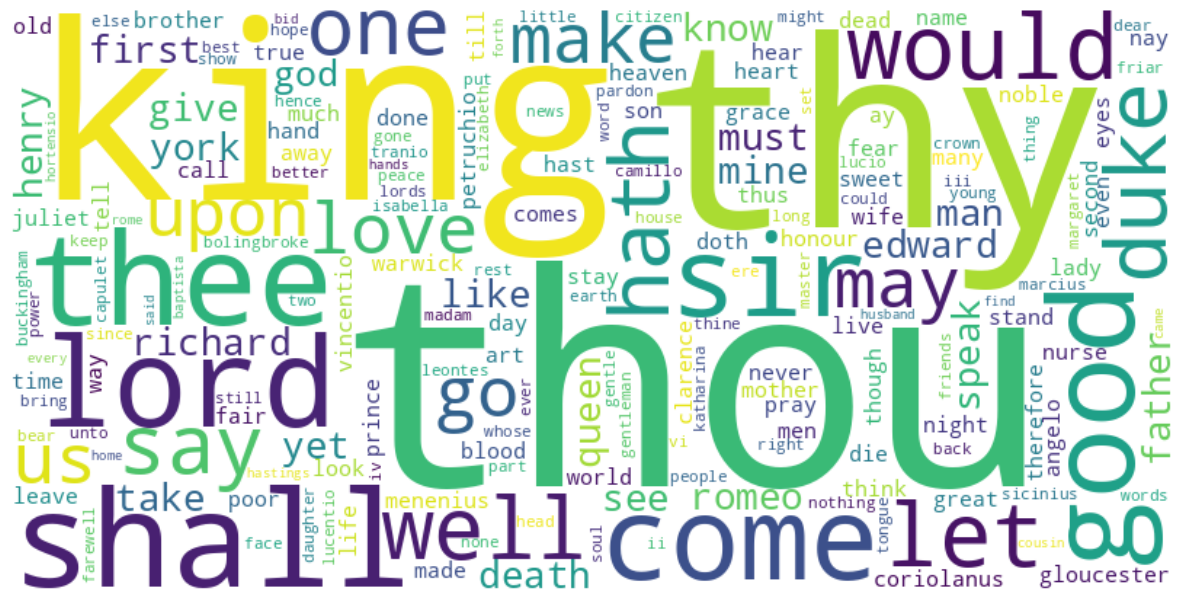

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


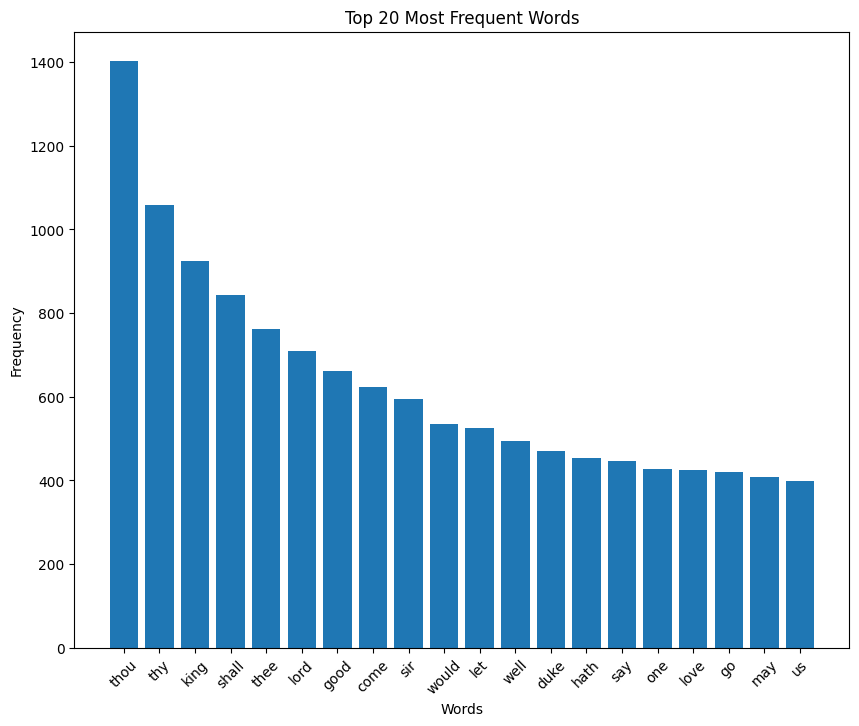

In [57]:
import matplotlib.pyplot as plt

# Get the 20 most common words
most_common_words = word_counts.most_common(20)

# Unpack the words and their frequencies
words, frequencies = zip(*most_common_words)

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)  # Rotate the words on x-axis to avoid overlapping
plt.show()


# Your Turn
Run the following code to get a novel from HugginFace and conduct Zipf's law analysis.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

import requests

# URL to the raw text file on GitHub
url ="https://datasets-server.huggingface.co/rows?dataset=JiggaBooJombs%2FNovelist&config=default&split=train&offset=0&length=100"

# Use requests to get the content of the file
response = requests.get(url)

# Ensure the request was successful
if response.status_code == 200:
    text = response.text.lower()
    # Continue processing the text as needed
else:
    print("Failed to retrieve the file. Status code:", response.status_code)

# Tokenize the text
tokens = word_tokenize(text)

# POS Tagging

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') # Download the correct package
# Download the resource 'averaged_perceptron_tagger_eng'
nltk.download('averaged_perceptron_tagger_eng')

In [ ]:

# POS tagging the filtered tokens
pos_tags = nltk.pos_tag(filtered_tokens)

# Count word frequencies (including the POS tags for uniqueness)
word_counts = Counter(pos_tags)

# Create a list of dictionaries to later convert to a DataFrame
data = [{'Word': word, 'POS': pos, 'WordCount': count} for (word, pos), count in word_counts.items()]

# Create the DataFrame
df_pos = pd.DataFrame(data)

# Display the first few rows of the DataFrame to verify
print(df_pos.head())

## Create POS mapping

In [ ]:
pos_tag_full_form = {
    'CC': 'Coordinating conjunction',
    'CD': 'Cardinal number',
    'DT': 'Determiner',
    'EX': 'Existential there',
    'FW': 'Foreign word',
    'IN': 'Preposition or subordinating conjunction',
    'JJ': 'Adjective',
    'JJR': 'Adjective, comparative',
    'JJS': 'Adjective, superlative',
    'LS': 'List item marker',
    'MD': 'Modal',
    'NN': 'Noun, singular or mass',
    'NNS': 'Noun, plural',
    'NNP': 'Proper noun, singular',
    'NNPS': 'Proper noun, plural',
    'PDT': 'Predeterminer',
    'POS': 'Possessive ending',
    'PRP': 'Personal pronoun',
    'PRP$': 'Possessive pronoun',
    'RB': 'Adverb',
    'RBR': 'Adverb, comparative',
    'RBS': 'Adverb, superlative',
    'RP': 'Particle',
    'SYM': 'Symbol',
    'TO': 'to',
    'UH': 'Interjection',
    'VB': 'Verb, base form',
    'VBD': 'Verb, past tense',
    'VBG': 'Verb, gerund or present participle',
    'VBN': 'Verb, past participle',
    'VBP': 'Verb, non-3rd person singular present',
    'VBZ': 'Verb, 3rd person singular present',
    'WDT': 'Wh-determiner',
    'WP': 'Wh-pronoun',
    'WP$': 'Possessive wh-pronoun',
    'WRB': 'Wh-adverb'
}


In [ ]:
df_pos['POS Full Form'] = df_pos['POS'].map(pos_tag_full_form)

# Display the DataFrame with the new column
print(df_pos.head())

In [ ]:
# Count total occurrences of words for each POS tag
pos_total_counts = df_pos.groupby('POS').size()

# Display the total occurrences of words for each POS tag
print(pos_total_counts)

# Your Turn
Conduct POS analysis for `sms_spam.csv` and `oct_delta.csv` data.